# Airline Passenger Satisfaction

## problem domain

* The dataset contains information about airline passengers and their satisfaction with various aspects of their flight experience. The data includes over 129880 records with 24 features such as gender, age, flight distance, inflight wifi service, cleanliness, departure/arrival time convenient, etc.

* The target variable is "satisfaction" which indicates whether a passenger was satisfied or dissatisfied with their overall flight experience. The dataset also provides information on the type of travel (business or personal), the class of travel (economy, business, or eco plus), and the destination region.


* This dataset can be used to build classification models that can help airlines improve their customer experience by identifying the key factors that drive satisfaction or dissatisfaction among their passengers.

# About Dataset:


# Context

* This dataset contains an airline passenger satisfaction survey.
* What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

# Content:

1. Gender: Gender of the passengers (Female, Male)

1. Customer Type: The customer type (Loyal customer, disloyal customer)

1. Age: The actual age of the passengers

1. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

1. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
 
1. Flight distance: The flight distance of this journey
 
1. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
 
1. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
 
1. Ease of Online booking: Satisfaction level of online booking
 
1. Gate location: Satisfaction level of Gate location
 
1. Food and drink: Satisfaction level of Food and drink
 
1. Online boarding: Satisfaction level of online boarding
 
1. Seat comfort: Satisfaction level of Seat comfort

1. Inflight entertainment: Satisfaction level of inflight entertainment

1. On-board service: Satisfaction level of On-board service

1. Leg room service: Satisfaction level of Leg room service

1. Baggage handling: Satisfaction level of baggage handling

1. Check-in service: Satisfaction level of Check-in service

1. Inflight service: Satisfaction level of inflight service
 
1. Cleanliness: Satisfaction level of Cleanliness
 
1. Departure Delay in Minutes: Minutes delayed when departure
 
1. Arrival Delay in Minutes: Minutes delayed when Arrival
 
1. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") #ignore any warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Loading the dataset

In [2]:
Train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
Test = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

# concating the train and test in one file

In [3]:
Data = pd.concat([Train, Test])

# show first 5 rows in the dataset

In [4]:
Data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Cleaning


Cleaning data is a crucial step in the data preparation process in any data analysis or machine learning project.

we clean data to :

1-Ensures Accuracy

2-Improves Model Performance

3-Enhances Data Quality

4-Prevents Biases

5-Addresses Missing Values

6-Enhances Data Understanding


# drop unneeded rows that don't affect in the dataset


**Drop id and Unnamed:0 columns that don't affect the dataframe**

In [5]:
Data = Data.drop(['Unnamed: 0','id'], axis=1)
Data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# show how many rows and columns in the dataset

In [6]:
Data.shape

(129880, 23)


# show the info of data

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non



# check missing values 

In [8]:
Data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

# drop null values

In [9]:
Data =Data.dropna().copy()

# check data after dropping null values

In [10]:
Data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# check if there is any duplicated value 

In [11]:
Data.duplicated().any() 

False

# show the describtion of data

In [12]:
Data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# show if there is any outliers or not 

**after checking of all columns using matplotlib library using boxplot to show outliers then I found that 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' have outliers **

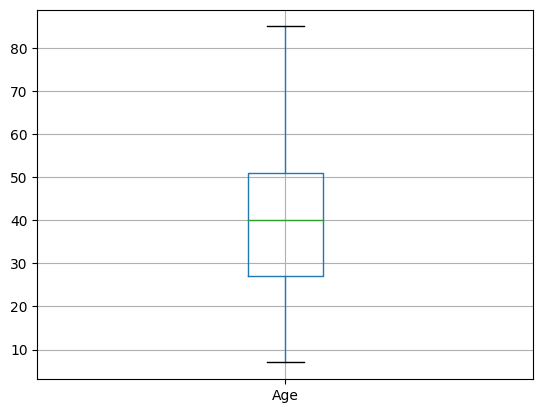

In [13]:
Data.boxplot('Age')
plt.show()

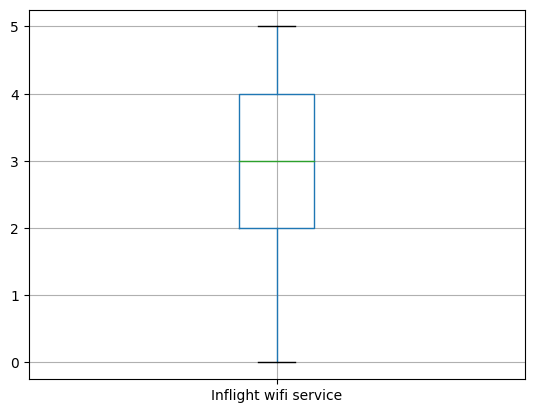

In [14]:
Data.boxplot('Inflight wifi service')
plt.show()

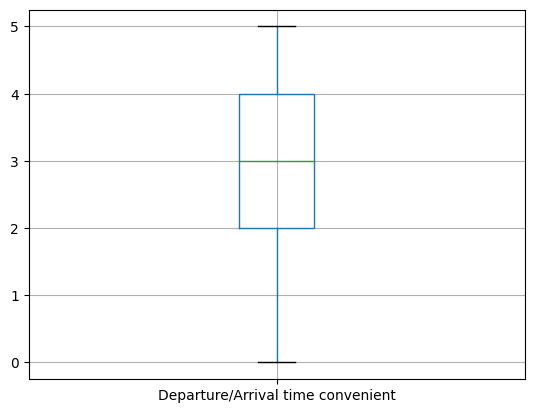

In [15]:
Data.boxplot('Departure/Arrival time convenient')
plt.show()

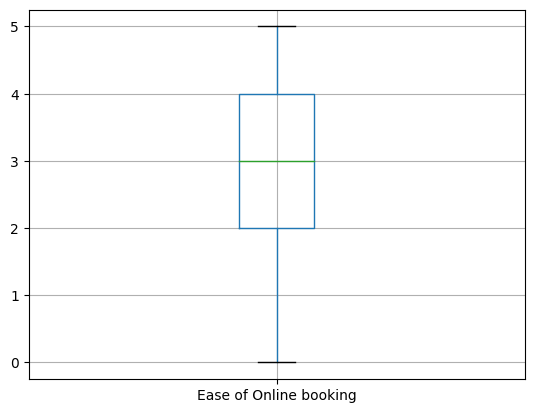

In [16]:
Data.boxplot('Ease of Online booking')
plt.show()

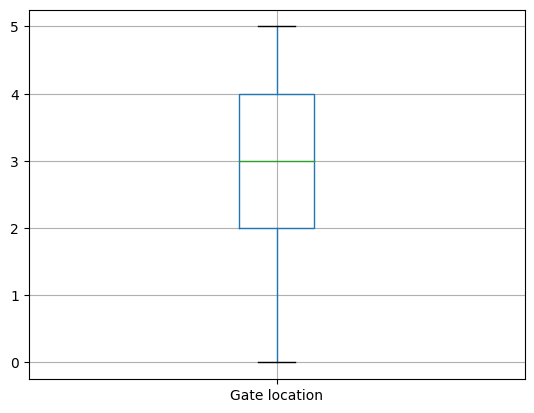

In [17]:
Data.boxplot('Gate location')
plt.show()

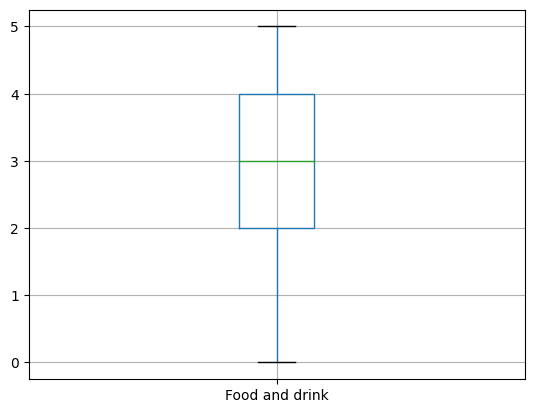

In [18]:
Data.boxplot('Food and drink')
plt.show()

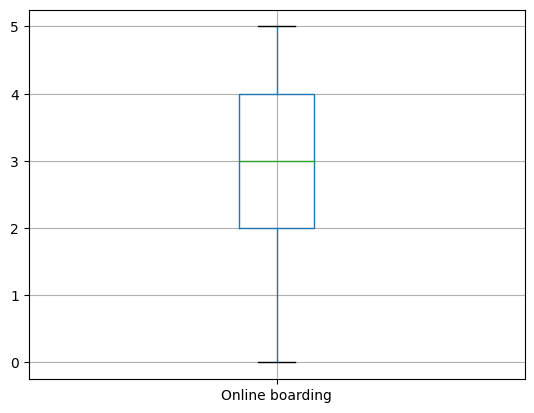

In [19]:
Data.boxplot('Online boarding')
plt.show()

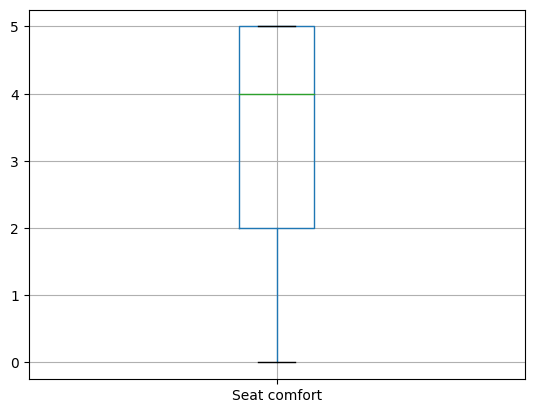

In [20]:
Data.boxplot('Seat comfort')
plt.show()

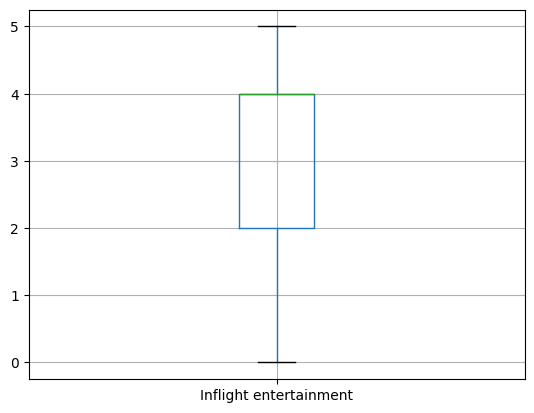

In [21]:
Data.boxplot('Inflight entertainment')
plt.show()

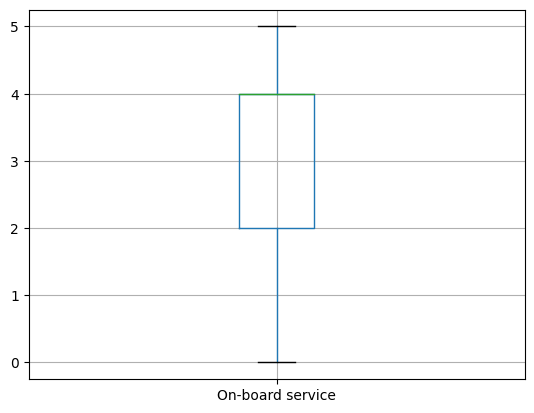

In [22]:
Data.boxplot('On-board service')
plt.show()

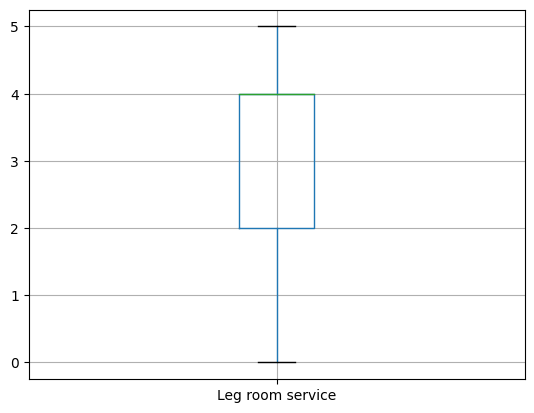

In [23]:
Data.boxplot('Leg room service')
plt.show()

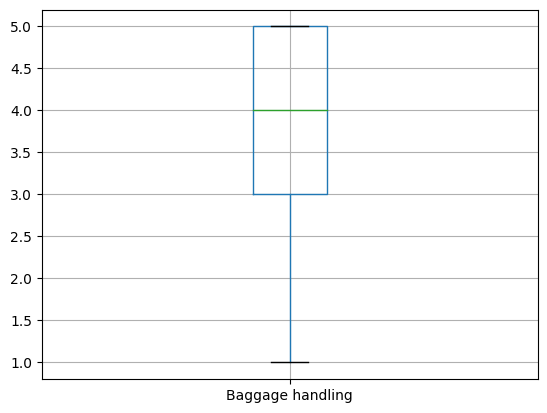

In [24]:
Data.boxplot('Baggage handling')
plt.show()

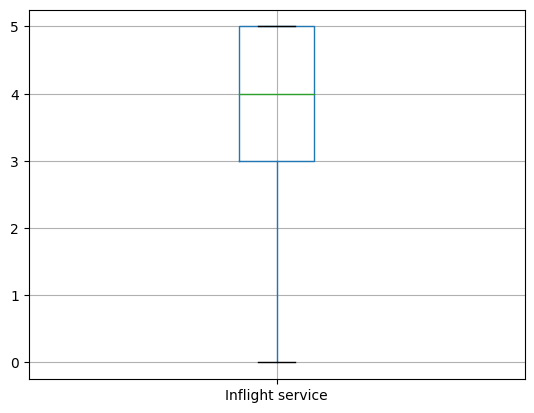

In [25]:
Data.boxplot('Inflight service')
plt.show()

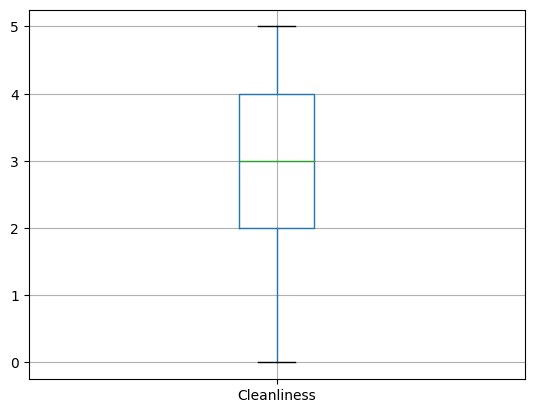

In [26]:
Data.boxplot('Cleanliness')
plt.show()

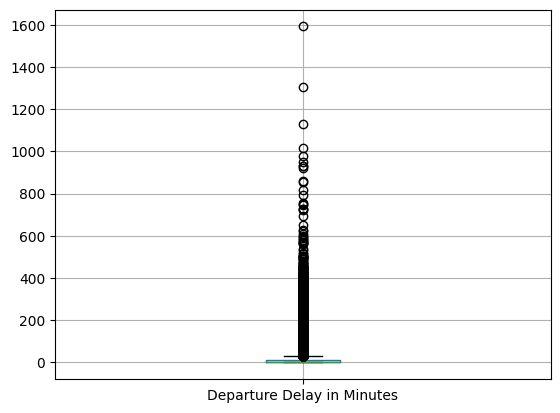

In [27]:
Data.boxplot('Departure Delay in Minutes')
plt.show()

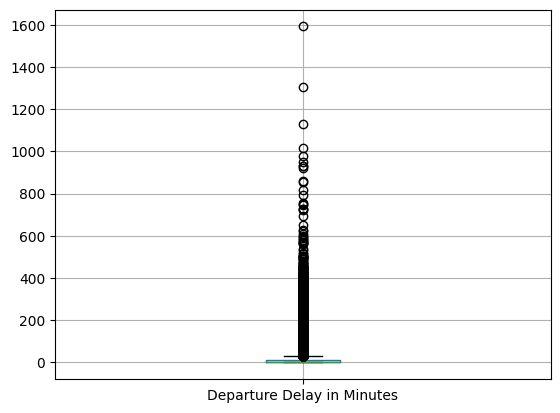

In [28]:
Data.boxplot('Departure Delay in Minutes')
plt.show()

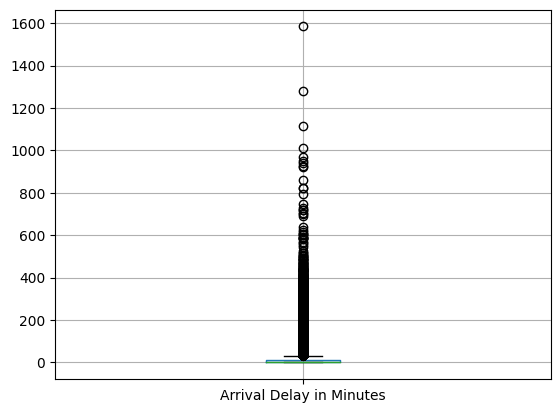

In [29]:
Data.boxplot('Arrival Delay in Minutes')
plt.show()

**the methods used for dropping outliers will bring data of these two columns to zero which remove all dataset rows**

**I showed the correlations of these features to the target and it don't affect it so, I removed these columns.**

In [30]:
Data = Data.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1)
Data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied


In [31]:
Data.shape

(129487, 21)

In [32]:
Data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,3,4,4,3,2,4,4,5,4,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,4,4,5,5,5,5,4,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,1,2,2,4,3,4,5,4,2,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,4,4,3,2,5,4,5,4,satisfied


# Selecting the Right Visualization Medium:

# 1- Bar Chart

# Example for Bar Chart that visualize number of satisfied and dissatisfied passengers based on Class

<Figure size 1500x600 with 0 Axes>

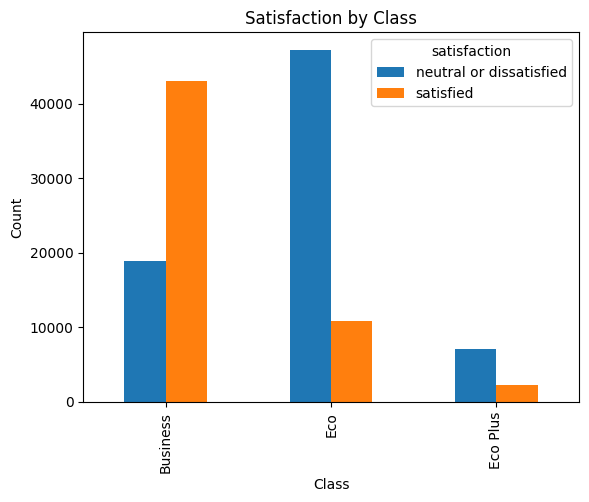

In [33]:
#Bar chart for 'Satisfaction' by 'Class'
plt.figure(figsize=(15, 6))
Data.groupby('Class')['satisfaction'].value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Another example for Bar Chart that visualize number of satisfied and dissatisfied passengers based on Type of Travel

<Figure size 1500x600 with 0 Axes>

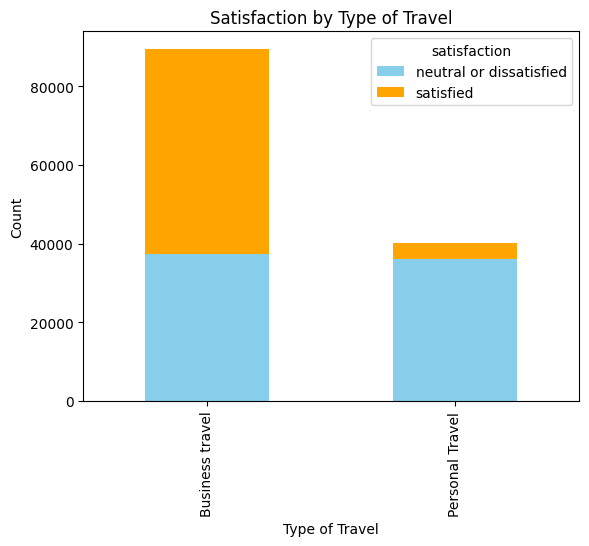

In [34]:
#Bar chart for 'Satisfaction' by 'Type of Travel'

plt.figure(figsize=(15, 6))
Data.groupby('Type of Travel')['satisfaction'].value_counts().unstack().plot(kind='bar', stacked=True,color=['skyblue', 'orange'])
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()


# subplots

# ---> in this section there are subplots of bar charts

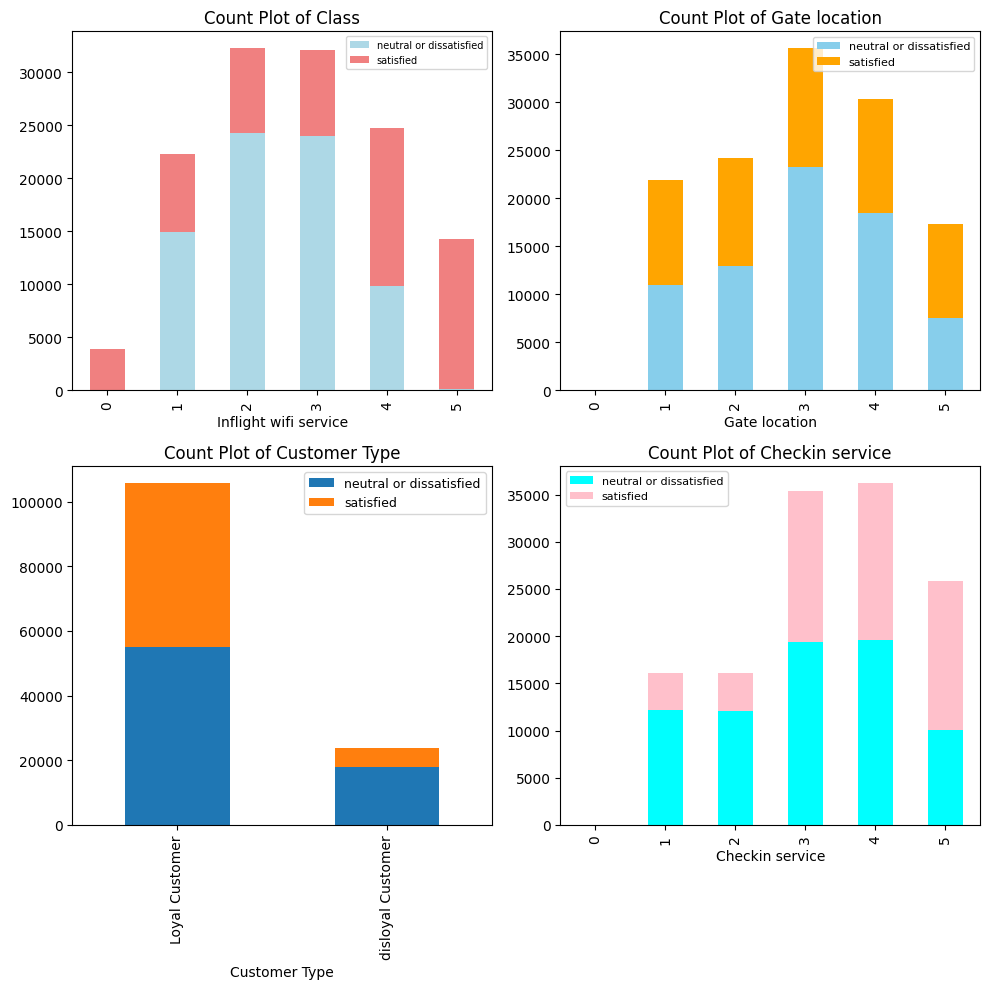

In [35]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
class_count = Data.groupby(['Inflight wifi service', 'satisfaction']).size().unstack()
class_count.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())
plt.title("Count Plot of Class")
plt.legend(loc='upper right', fontsize=7)

plt.subplot(2, 2, 2)
gate_count = Data.groupby(['Gate location', 'satisfaction']).size().unstack()
gate_count.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title("Count Plot of Gate location")
plt.legend(loc='upper right', fontsize=8)

plt.subplot(2, 2, 3)
customer_count = Data.groupby(['Customer Type', 'satisfaction']).size().unstack()
customer_count.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Count Plot of Customer Type")
plt.legend(loc='upper right', fontsize=9)

plt.subplot(2, 2, 4)
checkin_count = Data.groupby(['Checkin service', 'satisfaction']).size().unstack()
checkin_count.plot(kind='bar', stacked=True, color=['cyan', 'pink'], ax=plt.gca())
plt.title("Count Plot of Checkin service")
plt.legend(loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# 2-Pie Chart 



# this pie chart shows the percentage of satisfied and nuetral or dissatisfied passengers.

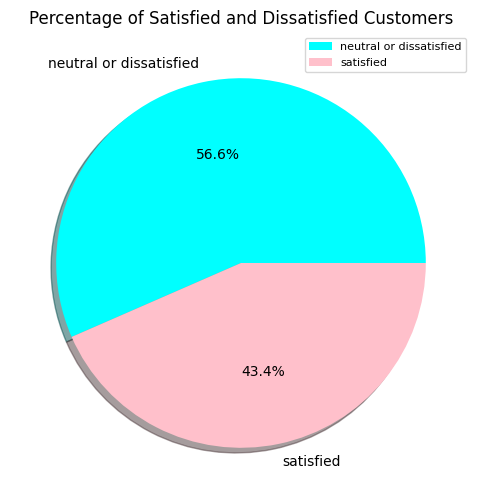

In [36]:
# Count of satisfied and dissatisfied customers
satisfaction_count = Data['satisfaction'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_count, labels=satisfaction_count.index, autopct='%1.1f%%', shadow=True,colors=['cyan', 'pink'])
plt.title("Percentage of Satisfied and Dissatisfied Customers")

# add legend
plt.legend(labels=satisfaction_count.index, loc='upper right', fontsize=8)

plt.show()

# this pie chart shows the percentage of passenger classes .

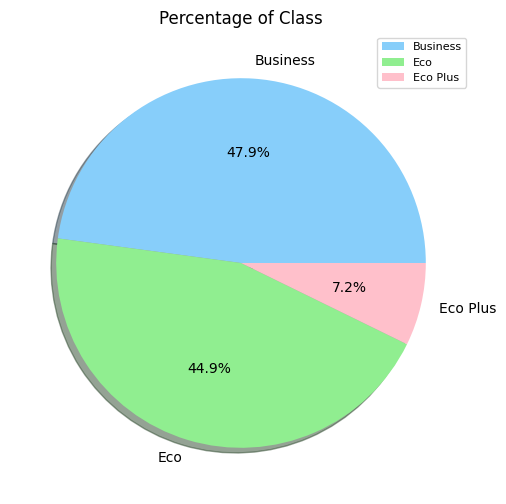

In [37]:
# Count of customers class
class_count = Data['Class'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_count, labels=class_count.index,shadow=True, autopct='%1.1f%%',colors=['lightskyblue', 'lightgreen', 'pink'])
plt.title("Percentage of Class")

# add legend
plt.legend(labels=class_count.index, loc='upper right', fontsize=8)

plt.show()

# this pie chart shows the percentage of passengers type of travel.

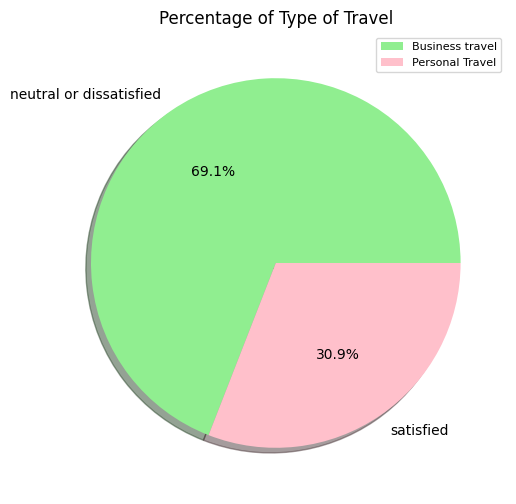

In [38]:
# Count of customers Type of Travel
type_count = Data['Type of Travel'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_count, labels=satisfaction_count.index,shadow=True, autopct='%1.1f%%',colors=['lightgreen', 'pink'])
plt.title("Percentage of Type of Travel")

# add legend
plt.legend(labels=type_count.index, loc='upper right', fontsize=8)

plt.show()

# this pie chart shows the percentage of passenger types.

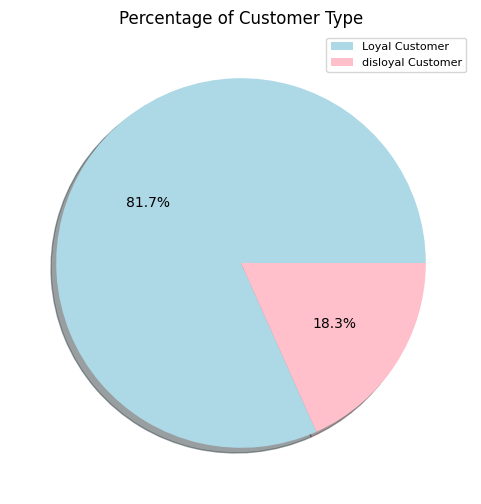

In [39]:
# Count of customers Type 
customer_type_count = Data['Customer Type'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(customer_type_count,shadow=True, autopct='%1.1f%%',colors=['lightblue', 'pink'])
plt.title("Percentage of Customer Type")

# add legend
plt.legend(labels=customer_type_count.index, loc='upper right', fontsize=8)

plt.show()

# 3-Histogram

# this histogam shows the distribution pf passengers by age

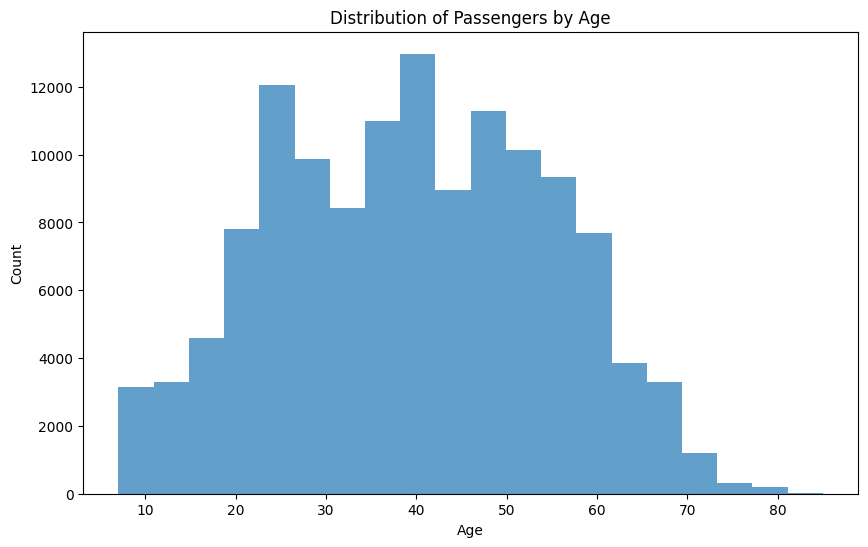

In [40]:
plt.figure(figsize=(10, 6))
Data['Age'].plot(kind='hist', bins=20, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Age')
plt.show()

# Histogram using x-tick values

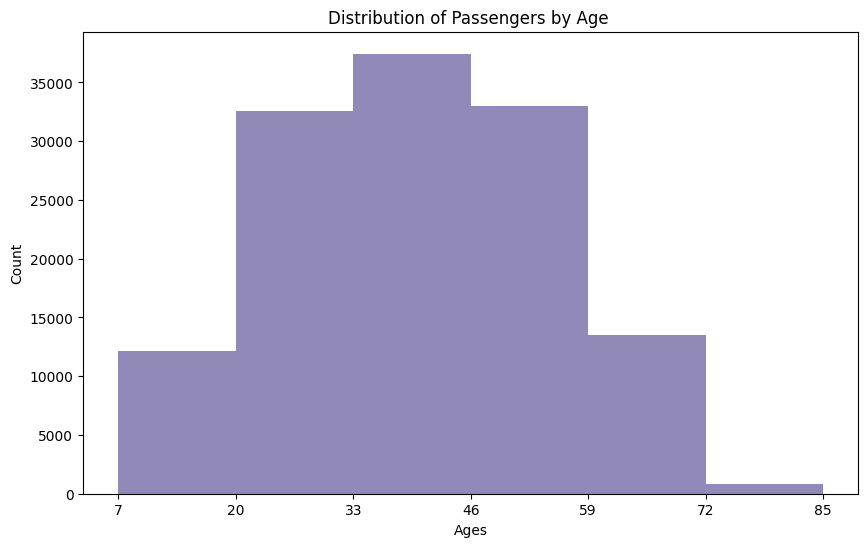

In [41]:
# let's get the x-tick values
count, bin_edges = np.histogram(Data['Age'], 6)
# un-stacked histogram
Data['Age'].plot(kind ='hist',
figsize=(10, 6),
bins=6,
alpha=0.6,
xticks=bin_edges,
color=['darkslateblue']
)
plt.title('Distribution of Passengers by Age ')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.show()

# 4- line plot 

# this line plot shows Counts of Customer Satisfaction and dissatisfied by Departure/Arrival Time Convenient

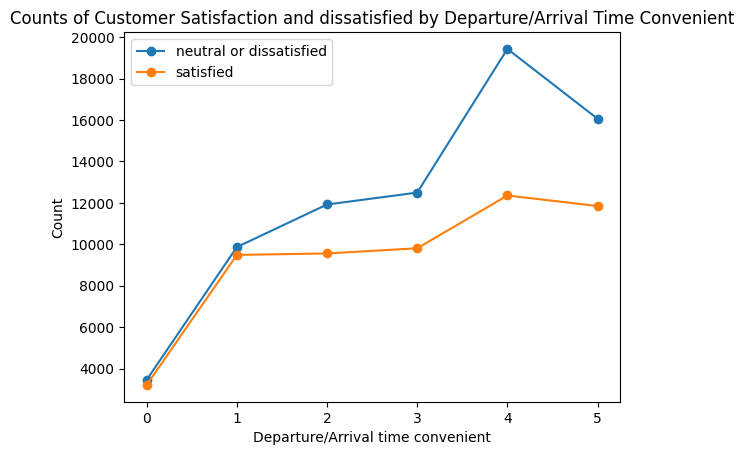

In [42]:
# Line Plot
Data.groupby('Departure/Arrival time convenient')['satisfaction'].value_counts().unstack().plot(marker='o')
plt.xlabel('Departure/Arrival time convenient')
plt.ylabel('Count')
plt.title('Counts of Customer Satisfaction and dissatisfied by Departure/Arrival Time Convenient')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# this line plot shows Counts of Customer Satisfaction and dissatisfied by Class

<Figure size 1500x1500 with 0 Axes>

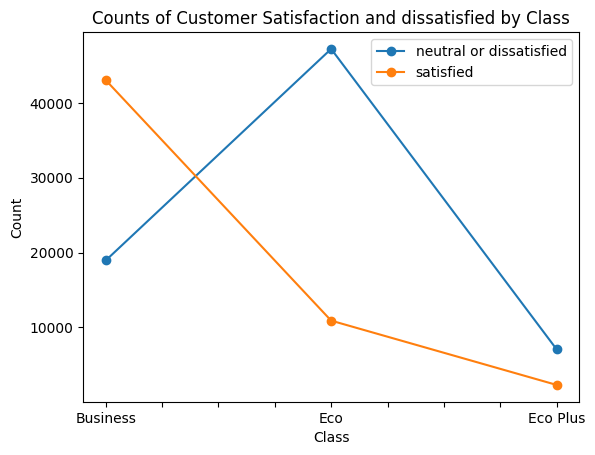

In [43]:
# Line Plot
plt.figure(figsize=(15, 15))
Data.groupby('Class')['satisfaction'].value_counts().unstack().plot(marker='o')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Customer Satisfaction and dissatisfied by Class')
plt.legend(loc='upper right', fontsize=10)
plt.show()

# this line plot shows Counts of Customer Satisfaction and dissatisfied by Seat Comfort

<Figure size 1500x1500 with 0 Axes>

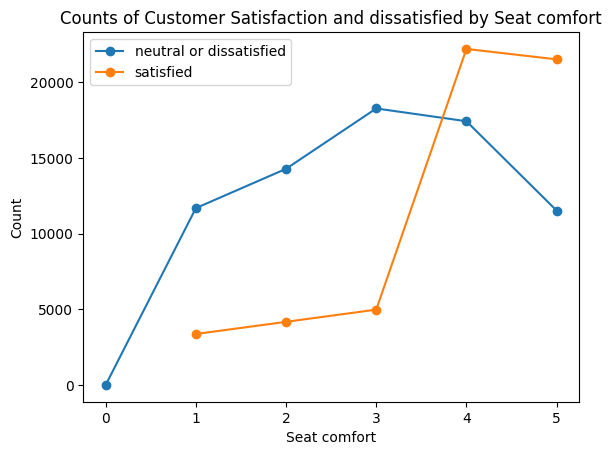

In [44]:
# Line Plot
plt.figure(figsize=(15, 15))
Data.groupby('Seat comfort')['satisfaction'].value_counts().unstack().plot(marker='o')
plt.xlabel('Seat comfort')
plt.ylabel('Count')
plt.title('Counts of Customer Satisfaction and dissatisfied by Seat comfort')
plt.legend(loc='upper left', fontsize=10)

plt.show()

# 5- Area Plot

# - Area plot used to show the distribution of passengers by age 

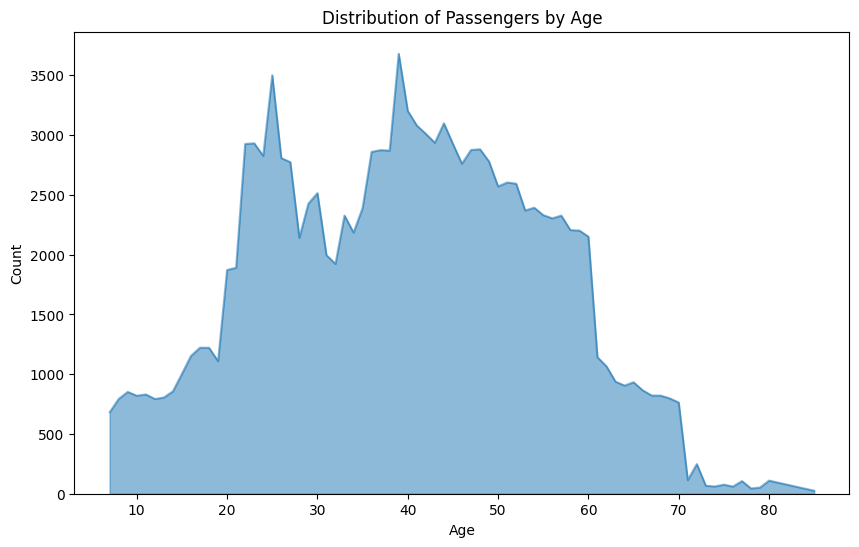

In [45]:
# Calculate the count of passengers in each age group
age_counts = Data['Age'].value_counts().sort_index()

# Area Plot
plt.figure(figsize=(10, 6))
age_counts.plot(kind='area', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Age')
plt.show()

# - Area plot used to show the distribution of passengers by seat comfort 

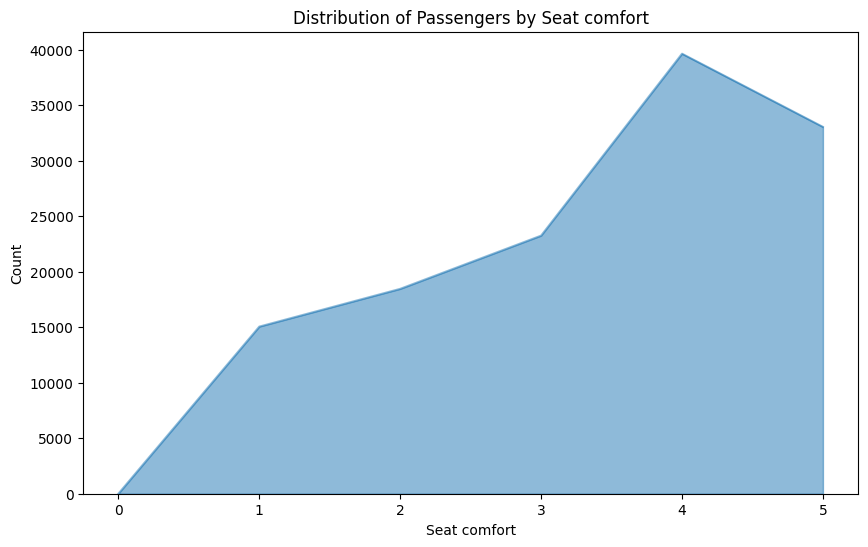

In [46]:
# Calculate the count of passengers in each seat comfort group
age_counts = Data['Seat comfort'].value_counts().sort_index()
# Area Plot
plt.figure(figsize=(10, 6))
age_counts.plot(kind='area', alpha=0.5)
plt.xlabel('Seat comfort')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Seat comfort')
plt.show()

In [47]:
Data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied


# 6-Scatter Plot 

<Axes: xlabel='Flight Distance', ylabel='Age'>

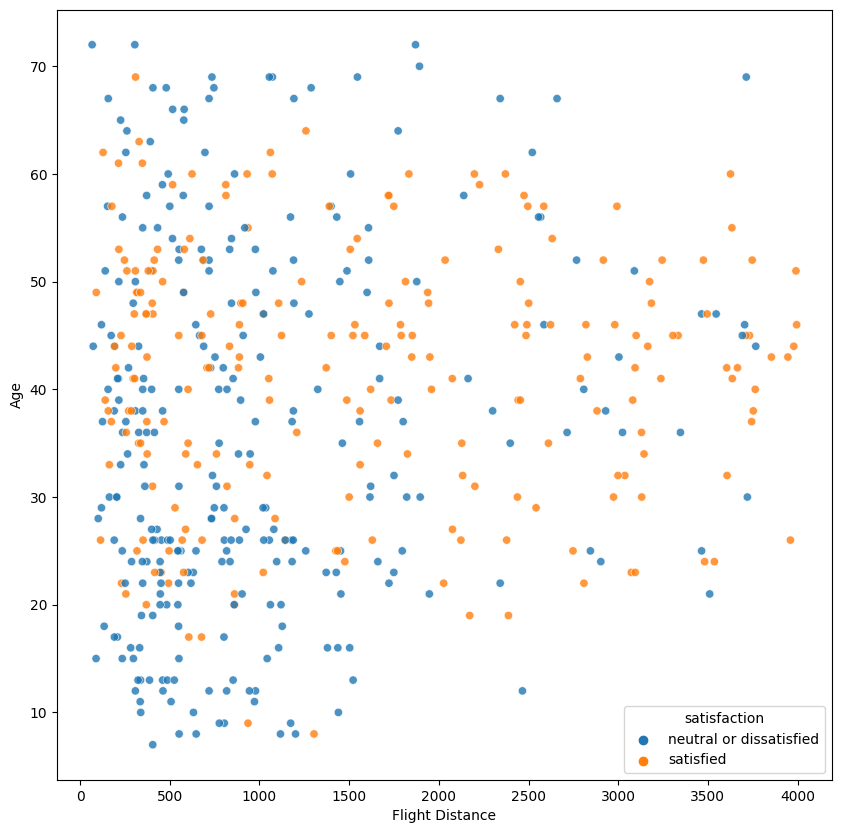

In [48]:
Sc_Data=Data.head(500)
plt.figure(figsize=(10,10))
sns.scatterplot(data=Sc_Data,x='Flight Distance',y='Age',
                hue='satisfaction',alpha=0.8)

# 7- Bubble plot

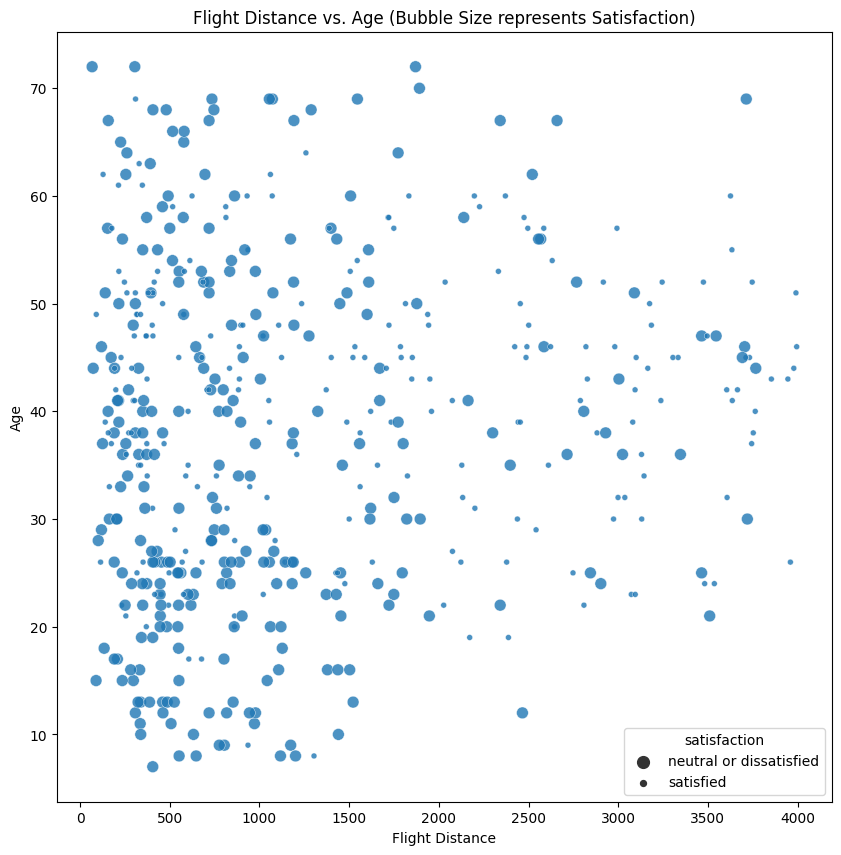

In [49]:
# Select the last 400 rows
b_Data = Data.head(500)

# Bubble Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=b_Data, x='Flight Distance', y='Age', size='satisfaction', alpha=0.8)
plt.xlabel('Flight Distance')
plt.ylabel('Age')
plt.title('Flight Distance vs. Age (Bubble Size represents Satisfaction)')
plt.show()

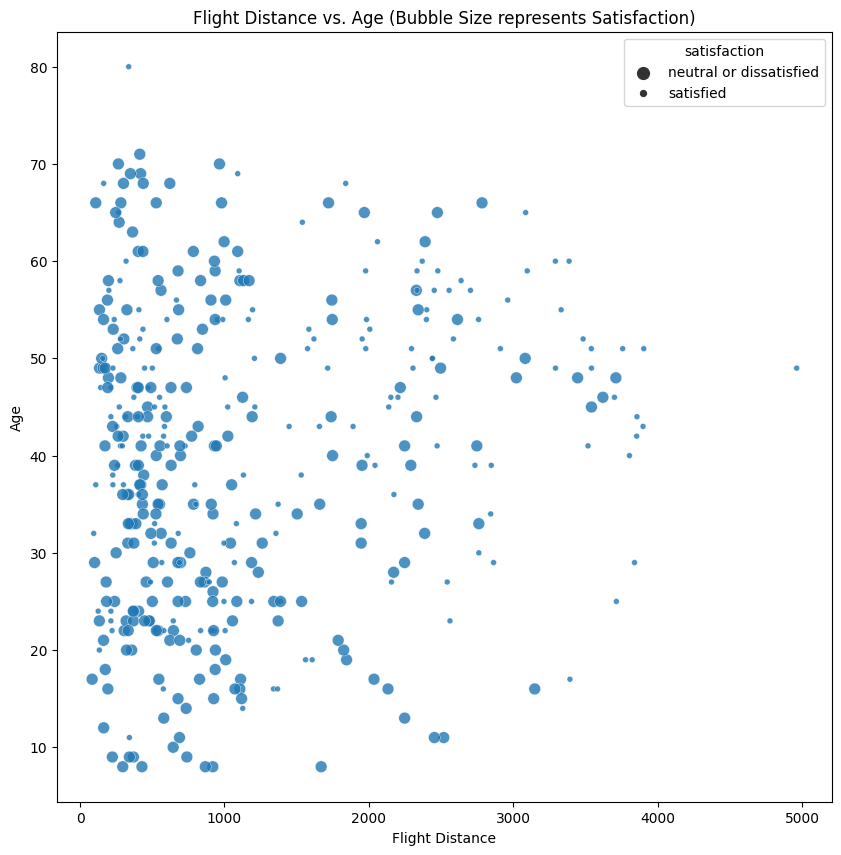

In [50]:
# Select the last 400 rows
b_Data = Data.tail(400)

# Bubble Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=b_Data, x='Flight Distance', y='Age', size='satisfaction', alpha=0.8)
plt.xlabel('Flight Distance')
plt.ylabel('Age')
plt.title('Flight Distance vs. Age (Bubble Size represents Satisfaction)')
plt.show()

# Machine learning model

# what are the inputs and what is the output ?

These columns are the **input** of my model :

Gender , Customer Type , Age , Type of Travel ,Class , Flight Distance , Inflight wifi service , Departure/Arrival time convenient, Ease of Online booking, Gate location , Food and drink, Online boarding , Seat comfort ,Inflight entertainment , On-board service , Leg room service , Baggage handling , Checkin service , Inflight service , Cleanliness , Departure Delay in Minutes , Arrival Delay in Minutes

the **output** will be **satisfaction** column


# label Encoding

# convert categorical labels into numeric format

In [51]:
Data['Gender']

0          Male
1          Male
2        Female
3        Female
4          Male
          ...  
25971      Male
25972      Male
25973    Female
25974      Male
25975    Female
Name: Gender, Length: 129487, dtype: object

In [52]:
Gender= {'Male':0,'Female':1}
Data['Gender'] = Data['Gender'].map(Gender)
Data['Gender']

0        0
1        0
2        1
3        1
4        0
        ..
25971    0
25972    0
25973    1
25974    0
25975    1
Name: Gender, Length: 129487, dtype: int64

In [53]:
Data['Customer Type']

0           Loyal Customer
1        disloyal Customer
2           Loyal Customer
3           Loyal Customer
4           Loyal Customer
               ...        
25971    disloyal Customer
25972       Loyal Customer
25973       Loyal Customer
25974       Loyal Customer
25975       Loyal Customer
Name: Customer Type, Length: 129487, dtype: object

In [54]:
Customer= {'Loyal Customer':0,'disloyal Customer':1}
Data['Customer Type'] = Data['Customer Type'].map(Customer)
Data['Customer Type']

0        0
1        1
2        0
3        0
4        0
        ..
25971    1
25972    0
25973    0
25974    0
25975    0
Name: Customer Type, Length: 129487, dtype: int64

In [55]:
Data['Type of Travel']

0        Personal Travel
1        Business travel
2        Business travel
3        Business travel
4        Business travel
              ...       
25971    Business travel
25972    Business travel
25973    Personal Travel
25974    Business travel
25975    Personal Travel
Name: Type of Travel, Length: 129487, dtype: object

In [56]:
Taverl_type = {'Personal Travel':0,'Business travel':1}
Data['Type of Travel'] = Data['Type of Travel'].map(Taverl_type)
Data['Type of Travel']

0        0
1        1
2        1
3        1
4        1
        ..
25971    1
25972    1
25973    0
25974    1
25975    0
Name: Type of Travel, Length: 129487, dtype: int64

In [57]:
Data['satisfaction']

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 129487, dtype: object

In [58]:
Satisfaction= {'neutral or dissatisfied':0,'satisfied':1}
Data['satisfaction'] = Data['satisfaction'].map(Satisfaction)
Data['satisfaction']

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129487, dtype: int64

# One Hot Encoding

In [59]:
Data['Class']

0        Eco Plus
1        Business
2        Business
3        Business
4        Business
           ...   
25971    Business
25972    Business
25973         Eco
25974    Business
25975         Eco
Name: Class, Length: 129487, dtype: object

In [60]:
Dummies = pd.get_dummies(Data['Class'])
Data = pd.concat([Data, Dummies], axis=1)
Data = Data.drop('Class', axis=1)
Data

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,460,3,4,3,1,5,...,4,3,4,4,5,5,0,False,False,True
1,0,1,25,1,235,3,2,3,3,1,...,1,5,3,1,4,1,0,True,False,False
2,1,0,26,1,1142,2,2,2,2,5,...,4,3,4,4,4,5,1,True,False,False
3,1,0,25,1,562,2,5,5,5,2,...,2,5,3,1,4,2,0,True,False,False
4,0,0,61,1,214,3,3,3,3,4,...,3,4,4,3,3,3,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,526,3,3,3,1,4,...,3,2,4,4,5,4,0,True,False,False
25972,0,0,23,1,646,4,4,4,4,4,...,4,5,5,5,5,4,1,True,False,False
25973,1,0,17,0,828,2,5,1,5,2,...,4,3,4,5,4,2,0,False,True,False
25974,0,0,14,1,1127,3,3,3,3,4,...,3,2,5,4,5,4,1,True,False,False


## Correlation with BALANCE variable

In [61]:
cor_target = abs(Data.corr()['satisfaction'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features.sort_values(ascending=False)

satisfaction                         1.000000
Business                             0.502605
Online boarding                      0.501620
Type of Travel                       0.449794
Eco                                  0.449495
Inflight entertainment               0.398334
Seat comfort                         0.348576
On-board service                     0.322329
Leg room service                     0.312557
Cleanliness                          0.306891
Flight Distance                      0.298206
Inflight wifi service                0.283291
Baggage handling                     0.248651
Inflight service                     0.245027
Checkin service                      0.237146
Food and drink                       0.211164
Customer Type                        0.185925
Ease of Online booking               0.168704
Age                                  0.134001
Eco Plus                             0.106120
Departure/Arrival time convenient    0.054457
Name: satisfaction, dtype: float64

In [62]:
Data

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,460,3,4,3,1,5,...,4,3,4,4,5,5,0,False,False,True
1,0,1,25,1,235,3,2,3,3,1,...,1,5,3,1,4,1,0,True,False,False
2,1,0,26,1,1142,2,2,2,2,5,...,4,3,4,4,4,5,1,True,False,False
3,1,0,25,1,562,2,5,5,5,2,...,2,5,3,1,4,2,0,True,False,False
4,0,0,61,1,214,3,3,3,3,4,...,3,4,4,3,3,3,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,526,3,3,3,1,4,...,3,2,4,4,5,4,0,True,False,False
25972,0,0,23,1,646,4,4,4,4,4,...,4,5,5,5,5,4,1,True,False,False
25973,1,0,17,0,828,2,5,1,5,2,...,4,3,4,5,4,2,0,False,True,False
25974,0,0,14,1,1127,3,3,3,3,4,...,3,2,5,4,5,4,1,True,False,False


# model before scaling , normalization and dimensionality reduction

In [63]:
Data_before_scal_norm=Data.copy()

In [64]:
Data_before_scal_norm.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,460,3,4,3,1,5,...,4,3,4,4,5,5,0,False,False,True
1,0,1,25,1,235,3,2,3,3,1,...,1,5,3,1,4,1,0,True,False,False
2,1,0,26,1,1142,2,2,2,2,5,...,4,3,4,4,4,5,1,True,False,False
3,1,0,25,1,562,2,5,5,5,2,...,2,5,3,1,4,2,0,True,False,False
4,0,0,61,1,214,3,3,3,3,4,...,3,4,4,3,3,3,1,True,False,False


In [65]:
Data_before_scal_norm.shape

(129487, 23)

In [66]:
Features_before_scal_norm = Data_before_scal_norm.drop('satisfaction', axis=1)
Target_before_scal_norm = Data_before_scal_norm['satisfaction']

In [67]:
Features_before_scal_norm

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Business,Eco,Eco Plus
0,0,0,13,0,460,3,4,3,1,5,...,5,4,3,4,4,5,5,False,False,True
1,0,1,25,1,235,3,2,3,3,1,...,1,1,5,3,1,4,1,True,False,False
2,1,0,26,1,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,True,False,False
3,1,0,25,1,562,2,5,5,5,2,...,2,2,5,3,1,4,2,True,False,False
4,0,0,61,1,214,3,3,3,3,4,...,3,3,4,4,3,3,3,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,526,3,3,3,1,4,...,4,3,2,4,4,5,4,True,False,False
25972,0,0,23,1,646,4,4,4,4,4,...,4,4,5,5,5,5,4,True,False,False
25973,1,0,17,0,828,2,5,1,5,2,...,2,4,3,4,5,4,2,False,True,False
25974,0,0,14,1,1127,3,3,3,3,4,...,4,3,2,5,4,5,4,True,False,False


In [68]:
Target_before_scal_norm

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129487, dtype: int64

# Splitting dataset to tree parts Training, Validation and Testing.

In [69]:
X, X_test, y, y_test = train_test_split(Features_before_scal_norm, Target_before_scal_norm,
                                        test_size = 0.20, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                        test_size = 0.20, random_state = 2)

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82871, 22)
(82871,)
(25898, 22)
(25898,)


In [71]:
train_acc=[]
val_acc=[]
test_acc=[]

# **Model**

## Decision Tree Classifier Model

### The best values for HyperParameters using GridSearchCV 

**criterion**: This hyperparameter determines the function used to measure the quality of a split. The two options are 'gini' (Gini impurity) and 'entropy' (information gain). ***The default value is 'gini'***.

**max_depth**: This hyperparameter determines the maximum depth of the decision tree. ***The default value is None***, which means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**splitter**: This hyperparameter determines the strategy used to choose the split at each node. The two options are 'best' (choose the best split) and 'random' (choose the best random split). ***The default value is 'best'***.

In [72]:
# define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,10,15, None],
     'splitter': ['best', 'random'],
 }

# create a decision tree model instance
dt = DecisionTreeClassifier()

# create a GridSearchCV instance with the parameter grid and the decision tree model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
y_pred_grid_search = grid_search.predict(X_test)
    
# print the best hyperparameters and corresponding score
print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=15)
Train Score:  0.9710513931290802
Validation Accuracy: 0.9544357563471377
Test Accuracy: 0.9532396324040466
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Best Score:  0.9527217381127759


### Train Decision Tree Classifier

In [73]:
DT = DecisionTreeClassifier(criterion='entropy',
                           max_depth=15,
                           splitter='random',
                           min_samples_split=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       splitter='random')

### Make predictions on the test data

In [74]:
y_pred_DT = DT.predict(X_test)

### Evaluate the performance of the model

In [75]:
train_acc.append(DT.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, DT.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_DT))
print("Train Accuracy:", DT.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, DT.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification report:\n", classification_report(y_test, y_pred_DT))
CM=confusion_matrix(y_test, y_pred_DT)

Train Accuracy: 0.9670330996367849
Validation Accuracy: 0.9557389709431412
Test Accuracy: 0.9511545293072824
Recall: 0.9275491154769313
Precision: 0.9586549062844543
Confusion matrix:
 [[14199   450]
 [  815 10434]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14649
           1       0.96      0.93      0.94     11249

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



Test Sensitivity (True Positive Rate): 0.9275491154769313
Test Specificity (True Negative Rate): 0.9692811796027032
Test ROC AUC: 0.9807872516285471


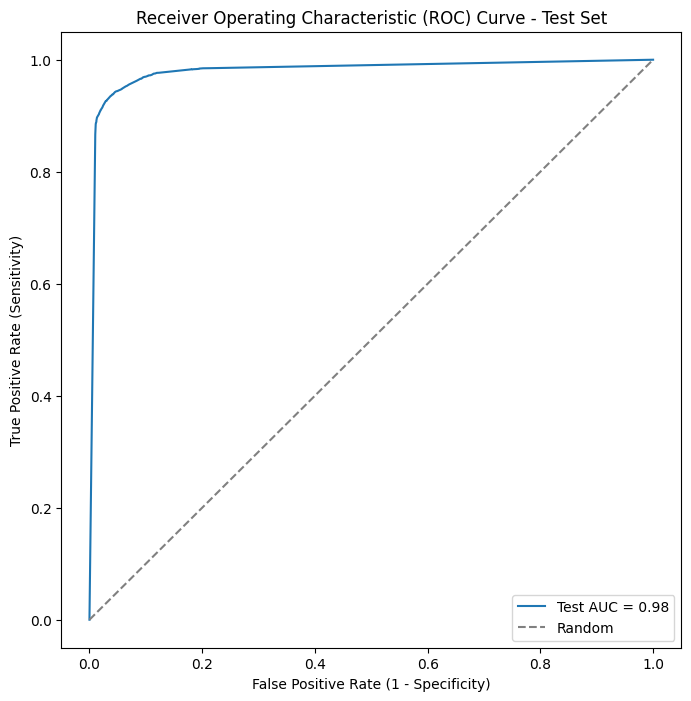

In [76]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Calculate sensitivity and specificity for the test set
sensitivity_test = CM[1, 1] / (CM[1, 0] + CM[1, 1])
specificity_test = CM[0, 0] / (CM[0, 0] + CM[0, 1])

# Print sensitivity and specificity for the test set
print("Test Sensitivity (True Positive Rate):", sensitivity_test)
print("Test Specificity (True Negative Rate):", specificity_test)

# ROC AUC for the test set
roc_auc_test = roc_auc_score(y_test, DT.predict_proba(X_test)[:, 1])

# Print ROC AUC for the test set
print("Test ROC AUC:", roc_auc_test)

# Plot ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, DT.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()


### Importance of Selected features for model 

<Figure size 1000x1000 with 0 Axes>

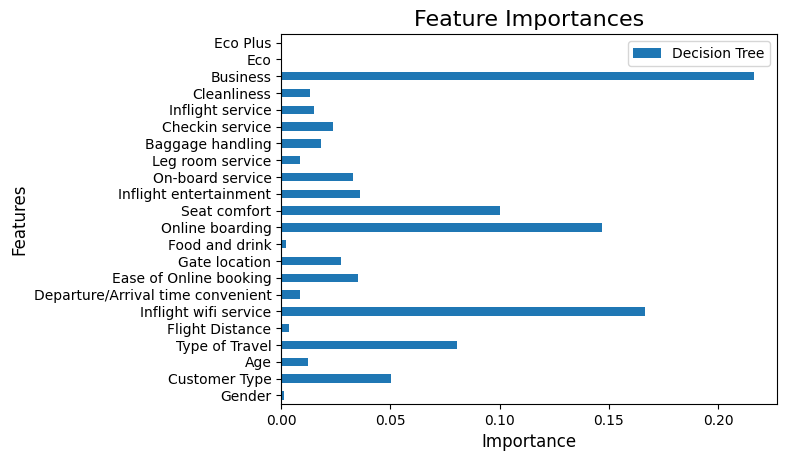

In [77]:
df = pd.DataFrame(DT.feature_importances_)
df.index=X_train.columns
df = df.rename(columns={0: 'Decision Tree'})
plt.figure(figsize=(10, 10))
ax = df.plot.barh()
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(axis='x', labelsize=10)
plt.title('Feature Importances', fontsize=16)
plt.show()

# model after scaling the data

# the goal of scaling data is to bring data in a similar scale

In [78]:
Data_after_scaling=Data.copy()

In [79]:
num_cols = ['Flight Distance']
scaler = StandardScaler()
Data_after_scaling[num_cols] = scaler.fit_transform(Data_after_scaling[num_cols])


In [80]:
Data_after_scaling

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,-0.731999,3,4,3,1,5,...,4,3,4,4,5,5,0,False,False,True
1,0,1,25,1,-0.957550,3,2,3,3,1,...,1,5,3,1,4,1,0,True,False,False
2,1,0,26,1,-0.048329,2,2,2,2,5,...,4,3,4,4,4,5,1,True,False,False
3,1,0,25,1,-0.629749,2,5,5,5,2,...,2,5,3,1,4,2,0,True,False,False
4,0,0,61,1,-0.978601,3,3,3,3,4,...,3,4,4,3,3,3,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665837,3,3,3,1,4,...,3,2,4,4,5,4,0,True,False,False
25972,0,0,23,1,-0.545543,4,4,4,4,4,...,4,5,5,5,5,4,1,True,False,False
25973,1,0,17,0,-0.363098,2,5,1,5,2,...,4,3,4,5,4,2,0,False,True,False
25974,0,0,14,1,-0.063365,3,3,3,3,4,...,3,2,5,4,5,4,1,True,False,False


In [81]:
Features_after_scaling = Data_after_scaling.drop('satisfaction', axis=1)
Target_after_scaling = Data_after_scaling['satisfaction']

In [82]:
Features_after_scaling

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Business,Eco,Eco Plus
0,0,0,13,0,-0.731999,3,4,3,1,5,...,5,4,3,4,4,5,5,False,False,True
1,0,1,25,1,-0.957550,3,2,3,3,1,...,1,1,5,3,1,4,1,True,False,False
2,1,0,26,1,-0.048329,2,2,2,2,5,...,5,4,3,4,4,4,5,True,False,False
3,1,0,25,1,-0.629749,2,5,5,5,2,...,2,2,5,3,1,4,2,True,False,False
4,0,0,61,1,-0.978601,3,3,3,3,4,...,3,3,4,4,3,3,3,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665837,3,3,3,1,4,...,4,3,2,4,4,5,4,True,False,False
25972,0,0,23,1,-0.545543,4,4,4,4,4,...,4,4,5,5,5,5,4,True,False,False
25973,1,0,17,0,-0.363098,2,5,1,5,2,...,2,4,3,4,5,4,2,False,True,False
25974,0,0,14,1,-0.063365,3,3,3,3,4,...,4,3,2,5,4,5,4,True,False,False


In [83]:
Target_after_scaling

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129487, dtype: int64

In [84]:
X, X_test, y, y_test = train_test_split(Features_after_scaling, Target_after_scaling,
                                        test_size = 0.20, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                        test_size = 0.20, random_state = 2)

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82871, 22)
(82871,)
(25898, 22)
(25898,)


In [86]:
train_acc=[]
val_acc=[]
test_acc=[]

In [87]:
# define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,10,15, None],
     'splitter': ['best', 'random'],
 }

# create a decision tree model instance
dt = DecisionTreeClassifier()

# create a GridSearchCV instance with the parameter grid and the decision tree model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
y_pred_grid_search = grid_search.predict(X_test)
    
# print the best hyperparameters and corresponding score
print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=15)
Train Score:  0.9710031253393829
Validation Accuracy: 0.9548701612124723
Test Accuracy: 0.9535485365665303
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Best Score:  0.9526372728296932


In [88]:
DT = DecisionTreeClassifier(criterion='entropy',
                           max_depth=15,
                           splitter='random',
                           min_samples_split=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       splitter='random')

In [89]:
y_pred_DT = DT.predict(X_test)

In [90]:
train_acc.append(DT.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, DT.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_DT))
print("Train Accuracy:", DT.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, DT.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification report:\n", classification_report(y_test, y_pred_DT))
CM=confusion_matrix(y_test, y_pred_DT)

Train Accuracy: 0.9641128983601018
Validation Accuracy: 0.9530842745438749
Test Accuracy: 0.9531237933431153
Recall: 0.9218597208640769
Precision: 0.9687062120504437
Confusion matrix:
 [[14314   335]
 [  879 10370]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     14649
           1       0.97      0.92      0.94     11249

    accuracy                           0.95     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



# Determine If the normalization affects the model or not

# the goal for normalization is to bring the data to be in range form 0 to 1

In [91]:
Data_after_normalization=Data.copy()

In [92]:
Data_after_normalization

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,460,3,4,3,1,5,...,4,3,4,4,5,5,0,False,False,True
1,0,1,25,1,235,3,2,3,3,1,...,1,5,3,1,4,1,0,True,False,False
2,1,0,26,1,1142,2,2,2,2,5,...,4,3,4,4,4,5,1,True,False,False
3,1,0,25,1,562,2,5,5,5,2,...,2,5,3,1,4,2,0,True,False,False
4,0,0,61,1,214,3,3,3,3,4,...,3,4,4,3,3,3,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,526,3,3,3,1,4,...,3,2,4,4,5,4,0,True,False,False
25972,0,0,23,1,646,4,4,4,4,4,...,4,5,5,5,5,4,1,True,False,False
25973,1,0,17,0,828,2,5,1,5,2,...,4,3,4,5,4,2,0,False,True,False
25974,0,0,14,1,1127,3,3,3,3,4,...,3,2,5,4,5,4,1,True,False,False


In [93]:
Features_after_normalization = Data_after_normalization.drop('satisfaction', axis=1)

In [94]:

Target_after_normalization = Data_after_normalization['satisfaction']

In [95]:

scaler = MinMaxScaler()
Features_after_normalization= scaler.fit_transform(Features_after_normalization)

In [96]:
Features_after_normalization

array([[0.        , 0.        , 0.07692308, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.23076923, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.24358974, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.12820513, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.08974359, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.44871795, ..., 0.        , 1.        ,
        0.        ]])

In [97]:
Target_after_normalization

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129487, dtype: int64

In [98]:
X, X_test, y, y_test = train_test_split(Features_after_normalization, Target_after_normalization,
                                        test_size = 0.20, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                        test_size = 0.20, random_state = 2)

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82871, 22)
(82871,)
(25898, 22)
(25898,)


In [100]:
# define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,10,15, None],
     'splitter': ['best', 'random'],
 }

# create a decision tree model instance
dt = DecisionTreeClassifier()

# create a GridSearchCV instance with the parameter grid and the decision tree model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
y_pred_grid_search = grid_search.predict(X_test)
    
# print the best hyperparameters and corresponding score
print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=15)
Train Score:  0.9710031253393829
Validation Accuracy: 0.9548701612124723
Test Accuracy: 0.9529307282415631
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Best Score:  0.9526131299072617


In [101]:
DT = DecisionTreeClassifier(criterion='entropy',
                           max_depth=15,
                           splitter='random',
                           min_samples_split=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       splitter='random')

In [102]:
y_pred_DT = DT.predict(X_test)

In [103]:
train_acc.append(DT.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, DT.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_DT))
print("Train Accuracy:", DT.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, DT.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification report:\n", classification_report(y_test, y_pred_DT))
CM=confusion_matrix(y_test, y_pred_DT)

Train Accuracy: 0.9644869737302555
Validation Accuracy: 0.9477748817453422
Test Accuracy: 0.9476021314387212
Recall: 0.9227486887723353
Precision: 0.9550975340449025
Confusion matrix:
 [[14161   488]
 [  869 10380]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     14649
           1       0.96      0.92      0.94     11249

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.95     25898
weighted avg       0.95      0.95      0.95     25898



# model performance after applying Dimensionality Reduction

# the goal of dimensionality reduction is to reduce the number of features (or dimensions) in a dataset while preserving its essential information.

In [104]:
df_reduced =Data_after_scaling.copy()

In [105]:
df_reduced

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,-0.731999,3,4,3,1,5,...,4,3,4,4,5,5,0,False,False,True
1,0,1,25,1,-0.957550,3,2,3,3,1,...,1,5,3,1,4,1,0,True,False,False
2,1,0,26,1,-0.048329,2,2,2,2,5,...,4,3,4,4,4,5,1,True,False,False
3,1,0,25,1,-0.629749,2,5,5,5,2,...,2,5,3,1,4,2,0,True,False,False
4,0,0,61,1,-0.978601,3,3,3,3,4,...,3,4,4,3,3,3,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665837,3,3,3,1,4,...,3,2,4,4,5,4,0,True,False,False
25972,0,0,23,1,-0.545543,4,4,4,4,4,...,4,5,5,5,5,4,1,True,False,False
25973,1,0,17,0,-0.363098,2,5,1,5,2,...,4,3,4,5,4,2,0,False,True,False
25974,0,0,14,1,-0.063365,3,3,3,3,4,...,3,2,5,4,5,4,1,True,False,False


In [106]:
Features_reduced = df_reduced.drop('satisfaction', axis=1)
Target_reduced = df_reduced['satisfaction']

In [107]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(Features_reduced)


In [108]:
X_pca

array([[-26.37987405,  -3.41318557,   1.57168113,   0.65595896],
       [-14.51584407,   3.89631511,  -1.79930567,  -1.07120007],
       [-13.34469049,  -3.02966136,   2.89232868,   1.14390069],
       ...,
       [-22.50052941,   1.88064644,  -1.2771607 ,  -2.03550023],
       [-25.39472571,  -2.18567687,   0.40326504,   0.34167613],
       [  2.49207783,   4.89226944,  -2.62831097,   3.19368987]])

In [109]:
X, X_test, y, y_test = train_test_split(X_pca, Target_reduced,
                                        test_size = 0.20, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                        test_size = 0.20, random_state = 2)

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82871, 4)
(82871,)
(25898, 4)
(25898,)


In [111]:
# define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,10,15, None],
     'splitter': ['best', 'random'],
 }

# create a decision tree model instance
dt = DecisionTreeClassifier()

# create a GridSearchCV instance with the parameter grid and the decision tree model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
y_pred_grid_search = grid_search.predict(X_test)
    
# print the best hyperparameters and corresponding score
print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

DecisionTreeClassifier(max_depth=15)
Train Score:  0.9048038517696179
Validation Accuracy: 0.823969495125012
Test Accuracy: 0.8255463742373929
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'}
Best Score:  0.8224951763479151


In [112]:
DT = DecisionTreeClassifier(criterion='entropy',
                           max_depth=15,
                           splitter='random',
                           min_samples_split=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       splitter='random')

In [113]:
y_pred_DT = DT.predict(X_test)

In [114]:
train_acc.append(DT.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, DT.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_DT))
print("Train Accuracy:", DT.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, DT.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification report:\n", classification_report(y_test, y_pred_DT))
CM=confusion_matrix(y_test, y_pred_DT)

Train Accuracy: 0.8465446296050488
Validation Accuracy: 0.8151365961965441
Test Accuracy: 0.8132288207583597
Recall: 0.7387323317628234
Precision: 0.8140673981191222
Confusion matrix:
 [[12751  1898]
 [ 2939  8310]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     14649
           1       0.81      0.74      0.77     11249

    accuracy                           0.81     25898
   macro avg       0.81      0.80      0.81     25898
weighted avg       0.81      0.81      0.81     25898



# **Thank you**